Iter: 0
D loss: 1.431
G_loss: 0.3675

Iter: 10
D loss: 1.279
G_loss: 0.4538

Iter: 20
D loss: 1.28
G_loss: 0.556

Iter: 30
D loss: 1.359
G_loss: 0.563

Iter: 40
D loss: 1.082
G_loss: 0.648

Iter: 50
D loss: 1.136
G_loss: 0.7616

Iter: 60
D loss: 1.252
G_loss: 1.221

Iter: 70
D loss: 1.818
G_loss: 1.009

Iter: 80
D loss: 1.572
G_loss: 0.8008

Iter: 90
D loss: 1.409
G_loss: 0.6601

(100, 2)
[[-0.15776229  1.754256  ]
 [ 1.0748053   2.6580226 ]
 [ 0.21310619  3.3537908 ]
 [ 1.097608    3.1439588 ]
 [ 0.5393884   2.8695672 ]
 [ 0.8377415   1.7845378 ]
 [ 1.9889983   2.0249717 ]
 [ 1.8224149   3.0827618 ]
 [ 2.5123065   2.9124084 ]
 [ 1.2861081   1.5853604 ]
 [ 1.5386376   2.148485  ]
 [ 0.25853056  1.3555028 ]
 [ 2.118113    2.2514362 ]
 [ 2.1561422   2.4593766 ]
 [ 1.725527    3.1113896 ]
 [ 0.67961204  2.7224622 ]
 [-0.10763842  1.4264805 ]
 [ 1.0961978   4.2792296 ]
 [ 1.0376933   3.0578723 ]
 [ 1.7172024   2.3566136 ]
 [ 2.0961838   2.5859725 ]
 [ 0.30692777  2.271515  ]
 [ 0.37661207 

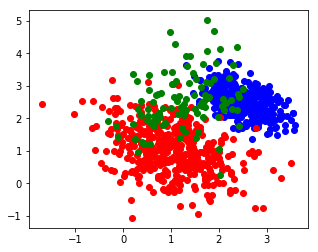

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
# test Articial dataSets
def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / tf.sqrt(in_dim / 2.)
    return tf.random_normal(shape=size, stddev=xavier_stddev)
X_dim = 2
X = tf.placeholder(tf.float32, shape=[None, X_dim])

D_W1 = tf.Variable(xavier_init([X_dim, 128]))
D_b1 = tf.Variable(tf.zeros(shape=[128]))

D_W2 = tf.Variable(xavier_init([128, 1]))
D_b2 = tf.Variable(tf.zeros(shape=[1]))

theta_D = [D_W1, D_W2, D_b1, D_b2]


Z = tf.placeholder(tf.float32, shape=[None, 100])

G_W1 = tf.Variable(xavier_init([100, 128]))
G_b1 = tf.Variable(tf.zeros(shape=[128]))

G_W2 = tf.Variable(xavier_init([128, X_dim]))
G_b2 = tf.Variable(tf.zeros(shape=[X_dim]))

theta_G = [G_W1, G_W2, G_b1, G_b2]


def sample_Z(m, n):
    return np.random.uniform(-1., 1., size=[m, n])

isPrint = tf.placeholder(tf.int32)
def generator(z,isPrint = 0):
    G_h1 = tf.nn.relu(tf.matmul(z, G_W1) + G_b1)
    G_log_prob = tf.matmul(G_h1, G_W2) + G_b2
    if(isPrint ==0): 
        G_prob = tf.nn.sigmoid(G_log_prob)
    else:
        G_prob = tf.matmul(G_h1, G_W2) + G_b2
        
    return G_prob


def discriminator(x):
    D_h1 = tf.nn.relu(tf.matmul(x, D_W1) + D_b1)
    D_logit = tf.matmul(D_h1, D_W2) + D_b2
    D_prob = tf.nn.sigmoid(D_logit)

    return D_prob, D_logit

G_sample = generator(Z,isPrint)
D_real, D_logit_real = discriminator(X)
D_fake, D_logit_fake = discriminator(G_sample)


#sigmoid_cross_entropy_with_logits是计算经sigmoid 函数激活之后的交叉熵,其中logits 和 targets 必须有相同的数据类型和数据维度。
#reduce_mean：如果不指定，则计算所有元素的均值;
D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_real, labels=tf.ones_like(D_logit_real)))
D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.zeros_like(D_logit_fake)))
D_loss = D_loss_real + D_loss_fake
G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=D_logit_fake, labels=tf.ones_like(D_logit_fake)))

D_solver = tf.train.AdamOptimizer().minimize(D_loss, var_list=theta_D)
G_solver = tf.train.AdamOptimizer().minimize(G_loss, var_list=theta_G)



a = np.loadtxt('./data/Artificial Data/gauss1.txt')
a_split1 = a[:,0:2]
a_split2 = a[:,2]
b = np.reshape(a_split1,(-1,X_dim))
plt.rcParams['figure.figsize']=(5.0,4.0)
plt.plot(a_split1[a_split2 >= 2,0:1], a_split1[a_split2 >= 2,1:2], 'bo')
plt.plot(a_split1[a_split2 < 2,0:1], a_split1[a_split2 < 2,1:2], 'ro')



sess = tf.Session()
sess.run(tf.global_variables_initializer())

if not os.path.exists('out/'):
    os.makedirs('out/')
    
# the number of epoch
mb_size = 3
Z_dim = 100

for it in range(100):

    # X_mb:the number of real sample:128
    # Z: sample_Z(mb_size, Z_dim):mb_size:128,Z_dim:100
    if(it ==99):
        G_loss_curr = sess.run(G_sample, feed_dict={Z: sample_Z(100, Z_dim),isPrint:1})
        print(G_loss_curr.shape)
        print(G_loss_curr)
        plt.plot(G_loss_curr[:,0], G_loss_curr[:,1], 'go')
        plt.show()
    else:
        _, D_loss_curr = sess.run([D_solver, D_loss], feed_dict={X: b, Z: sample_Z(mb_size, Z_dim)})
        _, G_loss_curr = sess.run([G_solver, G_loss], feed_dict={Z: sample_Z(mb_size, Z_dim),isPrint:0})

    if it % 10 == 0:
        print('Iter: {}'.format(it))
        print('D loss: {:.4}'. format(D_loss_curr))
        print('G_loss: {:.4}'.format(G_loss_curr))
        print()
        